# Automatizador de webscrapping y mailing

Se instalan librerias necesarias

!pip install yfinance webscrapping yahoo finance

!pip install matplotlib cálculos matemáticos y gráficos

!pip install pyautogui manejo de mouse y teclado


# Obtención de data con input de usuario

se importa yfinance

se crean variables para los datos que obtendremos del webscrapping

In [2]:
import yfinance

ticker = input("digite el código de la accion: ")
fecha_inicio = input("digite la fecha de inicio (aaaa-mm-dd): ")
fecha_cierre = input("digite la fecha de cierre (aaaa-mm-dd): ")

datos_yfinance = yfinance.Ticker(ticker)
datos_historicos = datos_yfinance.history(start=fecha_inicio, end=fecha_cierre)
datos_historicos

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-01 00:00:00-04:00,228.716036,228.845571,222.956284,225.417633,63285000,0.00,0.0
2024-10-02 00:00:00-04:00,225.098744,226.573556,222.238802,225.985626,32880600,0.00,0.0
2024-10-03 00:00:00-04:00,224.351374,226.015523,222.537757,224.879517,34044200,0.00,0.0
2024-10-04 00:00:00-04:00,227.101692,227.201348,223.344909,226.005554,37245100,0.00,0.0
2024-10-07 00:00:00-04:00,223.713622,224.899456,220.554728,220.913467,39505400,0.00,0.0
...,...,...,...,...,...,...,...
2025-05-08 00:00:00-04:00,197.461064,199.788014,194.425036,197.231369,50478900,0.00,0.0
2025-05-09 00:00:00-04:00,198.739390,200.277366,197.281295,198.270004,36453900,0.00,0.0
2025-05-12 00:00:00-04:00,210.970001,211.270004,206.750000,210.789993,63775800,0.26,0.0


# Uso extra de matplotlib 

Gráfico de periodo de cierre


In [5]:
cierre = datos_historicos.Close
cierre


Date
2025-01-02 00:00:00-05:00    243.263199
2025-01-03 00:00:00-05:00    242.774368
2025-01-06 00:00:00-05:00    244.410416
2025-01-07 00:00:00-05:00    241.627136
2025-01-08 00:00:00-05:00    242.115952
                                ...    
2025-05-07 00:00:00-04:00    195.992981
2025-05-08 00:00:00-04:00    197.231369
2025-05-09 00:00:00-04:00    198.270004
2025-05-12 00:00:00-04:00    210.789993
2025-05-13 00:00:00-04:00    212.929993
Name: Close, Length: 90, dtype: float64

<Axes: xlabel='Date'>

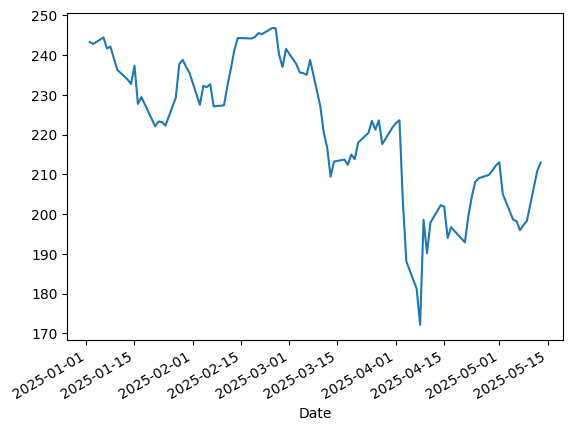

In [6]:
cierre.plot()


# analisis estadístico simple

mínima min(), round() cantidad de decimales visibles

máxima max() round() cantidad de decimales visibles

media mean() round() cantidad de decimales visibles

In [8]:
minima = round (cierre.min(), 2)
maxima = round (cierre.max(), 2)
promedio = round (cierre.mean(), 2)

print(minima)
print(maxima)
print(promedio)

172.19
246.78
221.39


# automatización de mailing

se usan coordenadas en pantalla con eje cartesiano similar al que se usa para insertar datos en pdf. El eje x es horizontal y el eje y es vertical. Esto varía según tamaños de pantallas.

se usa función nativa de python time y pyautogui.position para señalar la posicion del puntero en pantalla.

redactar = Point(x=87, y=217)

In [13]:
import time
import pyautogui

time.sleep(5)
print(pyautogui.position())

Point(x=1254, y=1006)


# Template del mail y pasos para automatizar el envío

se importa pyperclip y webbrowser. La primera es para guardar copias en el portapapeles y la segunda para abrir el navegador por defecto, ambas nativas de python

Point(x=1254, y=1006) enviar


In [1]:
import pyperclip
import webbrowser
from time import sleep

destinatario = "theteachercirope@gmail.com"
asunto = "Proyecto de análisis 2025"

mensaje = f"""
Buen día,

A continuación se presenta el análisis de la acción {ticker} del periodo
solicitado: {fecha_inicio} a {fecha_cierre}:

Cotización máxima: USD {maxima}
Cotización mínima: USD {minima}
Valor medio: USD {promedio}

"""

pyautogui.PAUSE = 3

# Abrir el navegador
webbrowser.open("https://mail.google.com/mail/u/0/#inbox")
sleep(3)

# hacer click en redactar

pyautogui.click(87, 217)

# escribir destinatario
pyperclip.copy(destinatario)
pyautogui.hotkey("ctrl", "v")

# escribir asunto
pyautogui.hotkey("tab")
pyperclip.copy(asunto)
pyautogui.hotkey("ctrl", "v")

# escribir mensaje
pyautogui.hotkey("tab")
pyperclip.copy(mensaje)
pyautogui.hotkey("ctrl", "v")

# enviar
pyautogui.click(1254, 1006)

# cerrar la pestaña
pyautogui.hotkey("ctrl", "w")

# mensaje de confirmación de envío
print("¡¡¡Mensaje enviado con éxito!!!")

NameError: name 'ticker' is not defined